### Importing Libraries

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Datasets

In [4]:
df1 = pd.read_csv('C:\\Users\\uphaa\\Documents\\deliveries.csv')

In [158]:
matches = pd.read_csv('C:\\Users\\uphaa\\Documents\\matches.csv')

### Converting the Raw data to readable format

In [22]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [24]:
matches.info()
#city,winner,playerofmatch,umpire1,2 has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


In [26]:
matches.drop(['id','umpire3'],axis = 1,inplace = True)

In [35]:
matches[matches.city.isnull()]
matches[matches.venue == 'Dubai International Cricket Stadium']

matches.city.replace(np.nan,'UAE',inplace = True)

In [38]:
match = matches.copy()

In [41]:
matches[matches.player_of_match.isnull()]

matches.drop([300,545,570],inplace = True)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [55]:
matches[matches.umpire2.isnull()]

matches.umpire1.replace(np.nan,'AY Dandekar',inplace = True)
matches.umpire2.replace(np.nan,'S Ravi',inplace = True)

In [46]:
dg = matches[matches.season == 2017]

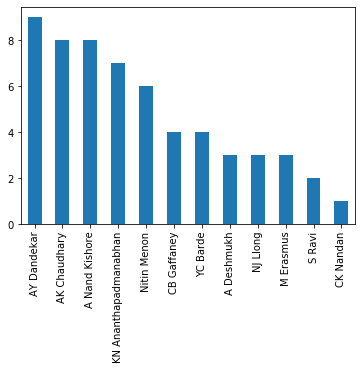

In [53]:
dg.umpire1.value_counts().plot(kind = 'bar')

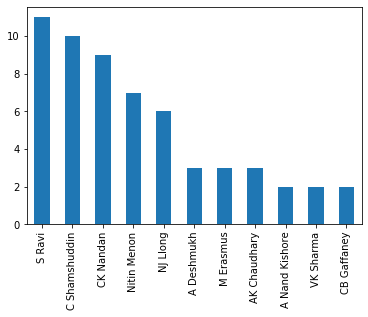

In [54]:
dg.umpire2.value_counts().plot(kind = 'bar')

# Visual wonder starts from here

## Most man of the matches won by a player

#### Christopher Henry Gayle has won the most MOM awards in IPL

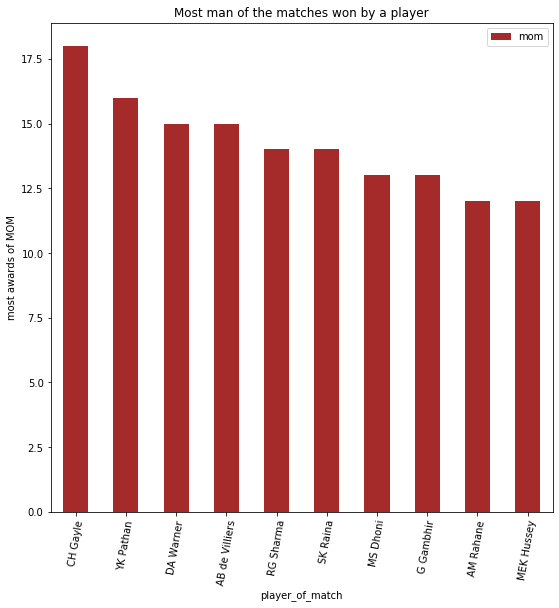

In [273]:
ma = matches.groupby('player_of_match')['player_of_match'].agg({'mom':'count'}).reset_index().sort_values('mom',ascending=0)
ma.iloc[:10,].plot('player_of_match','mom',kind='bar',color='brown')
plt.ylabel('most awards of MOM')
plt.xticks(rotation = 80)
plt.title('Most man of the matches won by a player')
plt.show()

## Most IPL Matches won by a team

#### Mumbai Indians are leading here

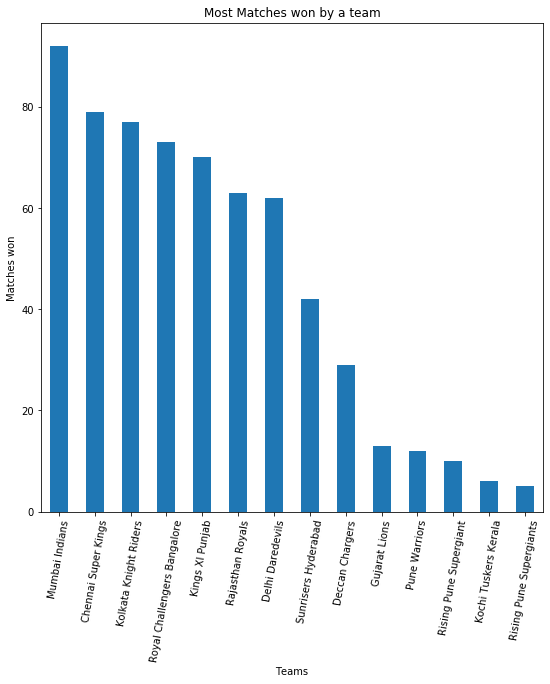

In [274]:
matches.winner.value_counts().plot(kind = 'bar')
plt.ylabel('Matches won')
plt.xlabel('Teams')
plt.title('Most Matches won by a team')
plt.xticks(rotation = 80)
plt.show()

## Matches per IPL season

#### 2012,2013 season hosted the maximum matches

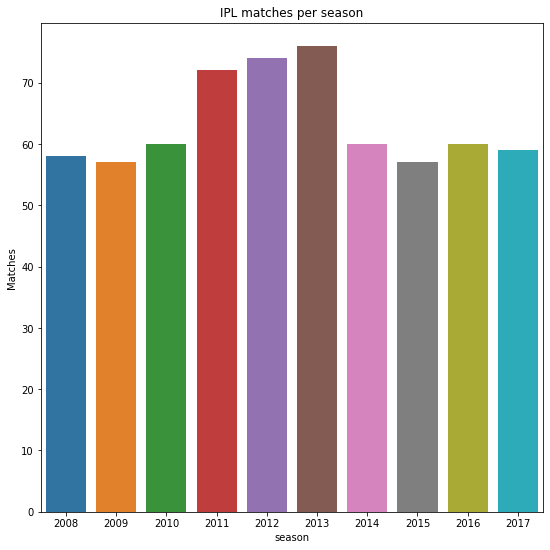

In [275]:
sns.countplot(matches.season)
plt.ylabel('Matches')
plt.title('IPL matches per season')
plt.show()

In [125]:
def win(x):
    if x > 0:
        return "bat first"
    else:
        return "field first"

In [126]:
matches['win_by'] = matches['win_by_runs'].apply(win)

## Toss factor on winning a match

#### It seems that teams enjoy chasing more in IPL

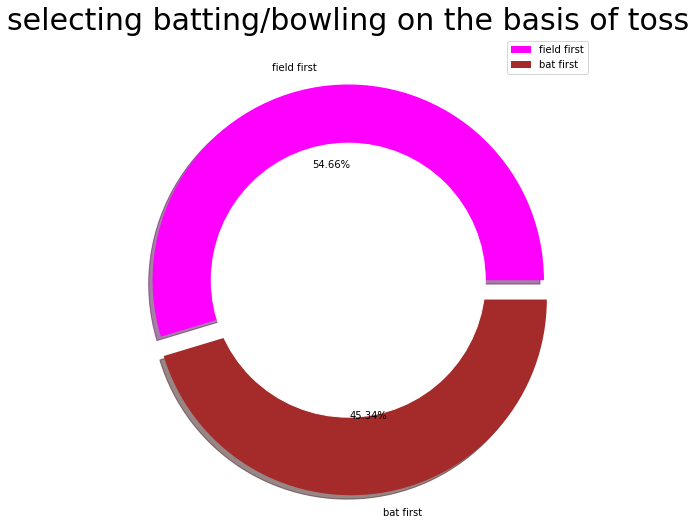

In [276]:
size = [346, 287]
colors = ['magenta', 'brown']
labels = "field first", "bat first"
explode = [0,0.1]
my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%',explode = explode)
plt.title('selecting batting/bowling on the basis of toss', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

### First Feilding team has an upper edge on winning ratio. 
### The only reason why captain probably chooses to field first after winning the toss

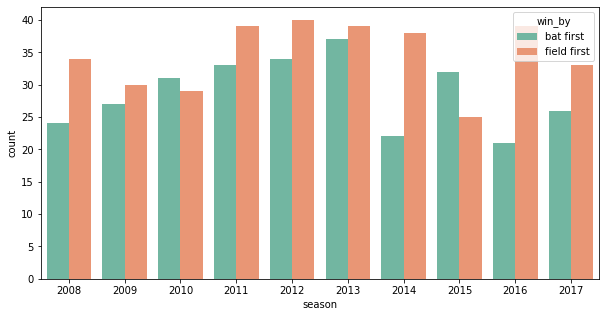

In [137]:
plt.figure(figsize = (10,5))
sns.countplot('season', hue ='win_by',data = matches,palette = "Set2")
plt.show()

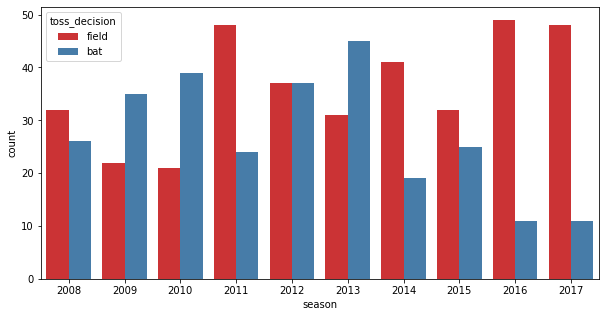

In [138]:
plt.figure(figsize = (10,5))
sns.countplot('season', hue ='toss_decision',data = matches,palette = "Set1")
plt.show()

## Perks of a Purple cap

#### Virat was a show-stealer in 2016 IPL

In [164]:
season = matches[['id','season','winner']]

In [165]:
main_data = df1.merge(season,how = 'inner',right_on = 'id',left_on = 'match_id')

<Figure size 576x144 with 0 Axes>

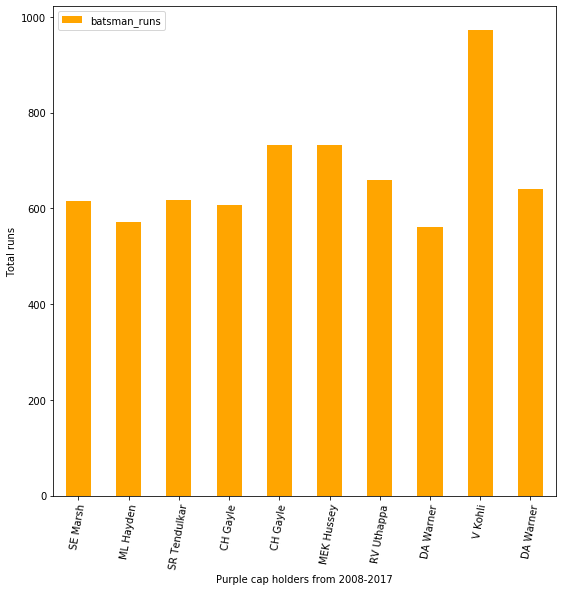

In [192]:
plt.figure(figsize = (8,2))
Season_orange_cap = main_data.groupby(["season","batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Season_orange_cap= Season_orange_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_orange_cap.plot('batsman','batsman_runs',color='orange',kind='bar')
plt.xticks(rotation=80)
plt.ylabel('Total runs')
plt.xlabel('Orange cap holders from 2008-2017')
plt.show()


In [188]:
Season_orange_cap

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


## The purple Yorks- Purple cap holders

#### DJ Bravo is a rockstar- justified!!

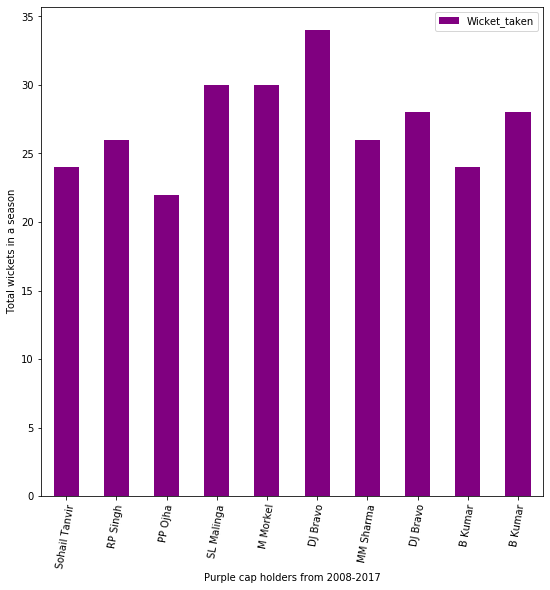

In [197]:
Season_purple_cap= main_data.groupby(["season","bowler"])["dismissal_kind"].agg('count').reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Season_purple_cap= Season_purple_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_purple_cap.columns= ["Season","Bowler","Wicket_taken"]
Season_purple_cap.plot('Bowler','Wicket_taken',color='purple',kind='bar')
plt.xticks(rotation=80)
plt.ylabel('Total wickets in a season')
plt.xlabel('Purple cap holders from 2008-2017')
plt.show()

In [198]:
Season_purple_cap

,Season,Bowler,Wicket_taken
0,2008,Sohail Tanvir,24
1,2009,RP Singh,26
2,2010,PP Ojha,22
3,2011,SL Malinga,30
4,2012,M Morkel,30
5,2013,DJ Bravo,34
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,B Kumar,24
9,2017,B Kumar,28


## IPL winners

In [205]:
final_matches=matches.drop_duplicates('season', keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


## Out of 10 seasons, 7 times toss winning captain in the final has won the IPL 

In [207]:
final_matches[final_matches.toss_winner == final_matches.winner]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by,id
58,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,bat first,59
116,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,field first,117
233,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,bat first,234
306,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,bat first,307
456,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,bat first,457
516,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,field first,517
635,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,bat first,636


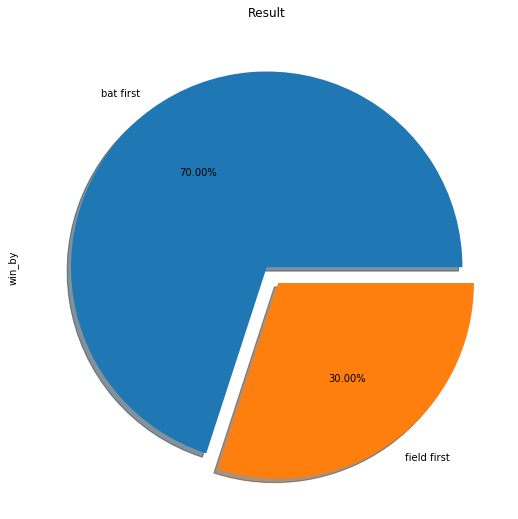

In [220]:
final_matches.win_by.value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow = True,explode = [0,0.1])
plt.title('Result')
plt.show()

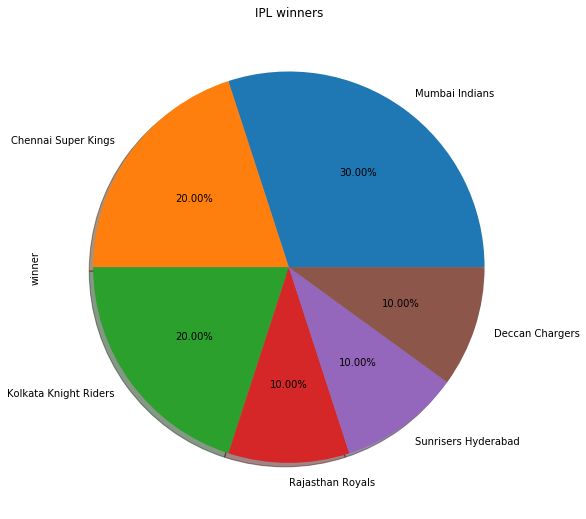

In [226]:
final_matches.winner.value_counts().plot(kind = 'pie',autopct = '%0.2f%%',shadow = True)
plt.title('IPL winners')
plt.show()

## The feast of Boundaries 

#### The BJP MLA has got no chill - Gautam Gambhir

In [228]:
fours = main_data[main_data.batsman_runs == 4]

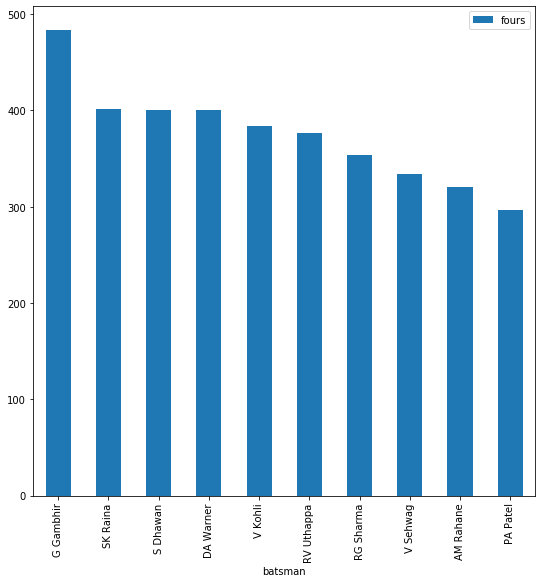

In [278]:
batsman_fours = fours.groupby('batsman')['batsman_runs'].agg({'fours':'count'}).reset_index().sort_values('fours',ascending = 0)
batsman_fours.iloc[:10,].plot('batsman','fours',kind = 'bar')
plt.show()

## SIX bonanza

### Is there any proof required that who is the UNIVERSE BOSS!!!

In [279]:
batsman_sixes = main_data[main_data.batsman_runs == 6].groupby('batsman')['batsman_runs'].agg({'six':'count'}).reset_index().sort_values('six',ascending = 0)


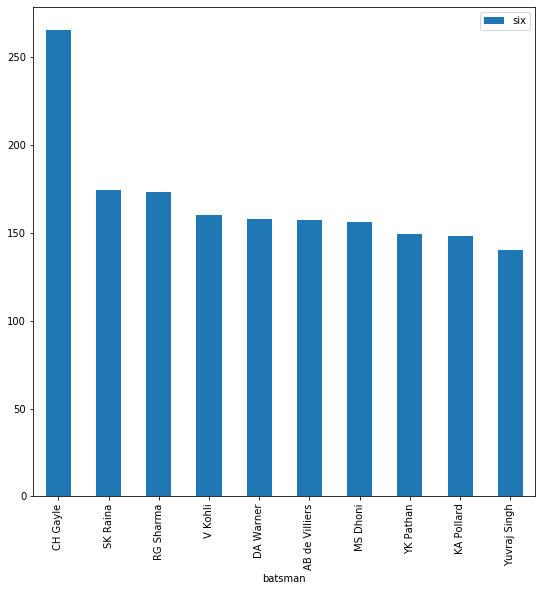

In [252]:
batsman_sixes.iloc[:10,].plot('batsman','six',kind = 'bar')
plt.show()

## IPL Heroes - leading Run-scorers

#### No doubt why CSK has been one of the most successful teams of IPL- Suresh Raina

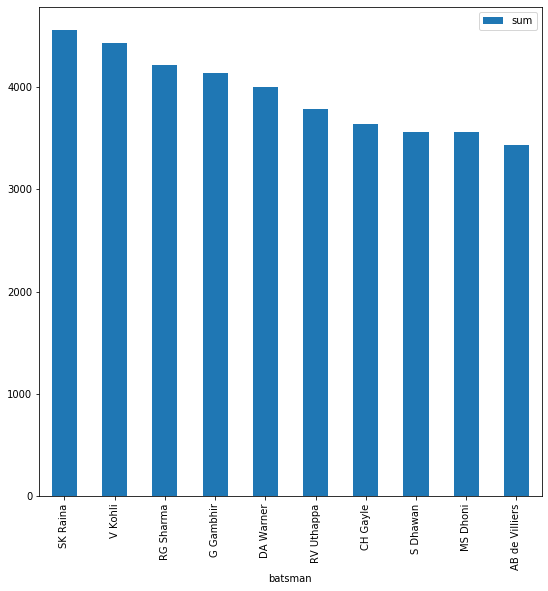

,batsman,sum
0,SK Raina,4548
1,V Kohli,4421
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,3995
5,RV Uthappa,3778
6,CH Gayle,3640
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3429


In [261]:
batsman_score=main_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score.iloc[:10,:].plot('batsman','sum',kind = 'bar')
plt.show()
batsman_score.iloc[:10,]

### Most wicket takers of IPL

#### World's no T20 team can be created without Lasith Malinga

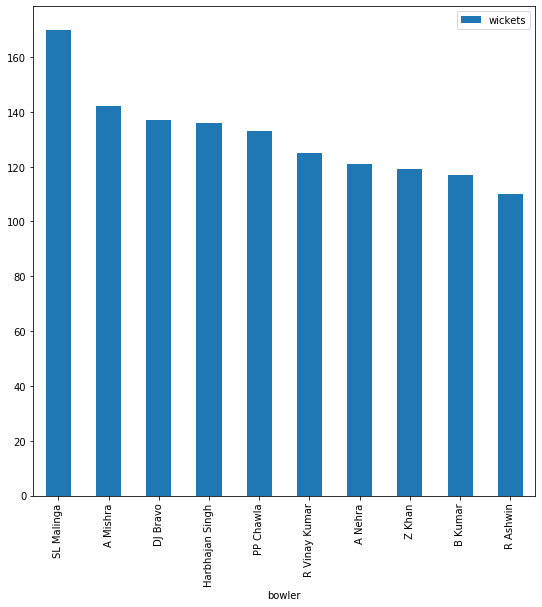

,bowler,wickets
294,SL Malinga,170
5,A Mishra,142
88,DJ Bravo,137
117,Harbhajan Singh,136
229,PP Chawla,133
244,R Vinay Kumar,125
7,A Nehra,121
354,Z Khan,119
50,B Kumar,117
234,R Ashwin,110


In [282]:
bowler = main_data.groupby('bowler')['dismissal_kind'].agg({'wickets':'count'}).reset_index().sort_values('wickets',ascending = 0)
bowler.iloc[:10,].plot('bowler','wickets',kind = 'bar')
plt.show()
bowler.iloc[:10,]